In [222]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import csv, json

import numpy as np
from sklearn.linear_model import LinearRegression

In [224]:
ls

Analysis of 10-20--100.ipynb
all_logs_10_20_100.csv
analysis_cpu1_sweep/
analysis_output/
boxplot current.png
boxplot power over time.png
boxplot power.png
correlation.png
correlation_analysis_pi_siglent_openai.ipynb
cpu1-00-10-20-30--100.csv.xlsx
cpu1.txt*
df_energylog.csv
df_siglentlog.csv
energy_log_cpu1-00-10-20-30--100.csv
energy_log_cpu1-00-10-20-30--100_annotated.csv
energy_log_cpu1-00-25-50-75-100-00.csv*
energy_log_cpu1-00-25-50-75-100-00_annotated.csv
rpi5_power_analysis_cpu1.ipynb
scatterplot with CPU load to Current Prediction (Linear Regression).png
scatterplot-predictions.png
scatterplot.png
siglent_cpu1-00-10-20-30--100-annotated.csv
siglent_cpu1-00-10-20-30--100.csv
siglent_cpu1-00-10-20-30--100.png
siglent_cpu1-00-25-50-75-100-00-annotated.csv
siglent_cpu1-00-25-50-75-100-00.csv
siglent_cpu1-00-25-50-75-100-00.png


In [225]:
# cat energy_log_cpu1-00-10-20-30--100_annotated.csv

In [228]:

df_energylog = pd.read_csv('energy_log_cpu1-00-10-20-30--100_annotated.csv',header=0,delimiter=';',decimal=',',thousands='.',names=[
    'time','voltage','current','cpuload'],usecols=[0,1,2,6])

In [230]:
df_energylog.dtypes

time       float64
voltage    float64
current    float64
cpuload    float64
dtype: object

In [232]:
df_energylog['time_datetime'] = pd.to_datetime(df_energylog['time'])


In [234]:
# cat siglent_cpu1-00-10-20-30--100-annotated.csv

In [236]:
df_siglentlog = pd.read_csv('siglent_cpu1-00-10-20-30--100-annotated.csv',header=0,delimiter=';',decimal=',',names=[
    'time','voltage','current','cpuload'],usecols=[0,1,2,7])

In [257]:
df_siglentlog = df_siglentlog.dropna()
df_siglentlog = df_siglentlog[df_siglentlog['cpuload'] != -1 ]

In [259]:
df_energylog = df_energylog.dropna()
df_energylog = df_energylog[df_energylog['cpuload'] != -1 ]

In [261]:
siglent_min_time = df_siglentlog['time'].min()
df_siglentlog['time_reset'] = df_siglentlog['time'] - siglent_min_time

df_energylog_min_time = df_energylog['time'].min()
df_energylog['time_reset'] = df_energylog['time'] - df_energylog_min_time

df = pd.concat([df_siglentlog,df_energylog])

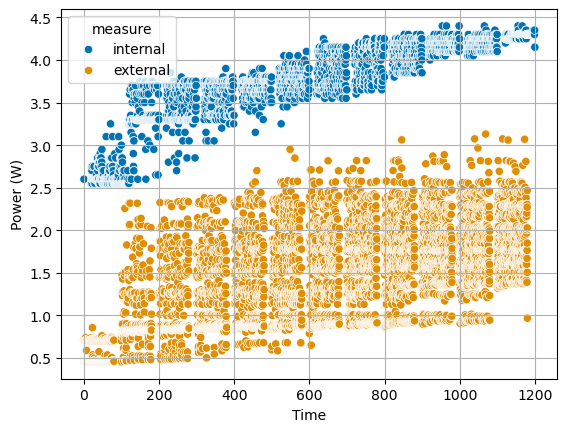

In [263]:
sns.scatterplot(data=df, x ='time_reset', y='power_calc', hue='measure', palette='colorblind')
plt.xlabel('Time')
plt.grid(True)
plt.ylabel('Power (W)')
plt.savefig('boxplot power over time.png')

In [10]:
#df_energylog_groupby = df_energylog.groupby('cpuload')

In [36]:
df_energylog["time_datetime"] = pd.to_timedelta(df_energylog["time"], unit="s")
df_energylog = df_energylog.set_index("time_datetime")
df_energylog_downsampled = df_energylog.resample("300ms").mean()

In [38]:
df_energylog_downsampled['cpuload'].unique() 

array([ nan,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.,
       100.])

In [40]:
df_energylog_downsampled = df_energylog_downsampled.dropna()

In [134]:
df_energylog = df_energylog_downsampled
df_energylog['cpuload'] = df_energylog['cpuload'].astype('int')

In [136]:
df_siglentlog = df_siglentlog.dropna()
df_siglentlog = df_siglentlog[df_siglentlog['cpuload'] != -1]

In [138]:
df_siglentlog['cpuload'] = df_siglentlog['cpuload'].astype('int')

In [140]:
df_siglentlog

,time,voltage,current,cpuload,time_reset,power_calc,measure
11,1.758017e+09,5,0.52,0,3.299,2.60,internal
78,1.758017e+09,5,0.51,0,23.416,2.55,internal
79,1.758017e+09,5,0.51,0,23.703,2.55,internal
80,1.758017e+09,5,0.55,0,24.005,2.75,internal
81,1.758017e+09,5,0.52,0,24.305,2.60,internal
...,...,...,...,...,...,...,...
4006,1.758019e+09,5,0.86,100,1201.803,4.30,internal
4007,1.758019e+09,5,0.86,100,1202.103,4.30,internal
4008,1.758019e+09,5,0.87,100,1202.403,4.35,internal
4009,1.758019e+09,5,0.83,100,1202.715,4.15,internal


In [54]:
df_siglentlog.to_csv('df_siglentlog.csv')

In [56]:
df_energylog

,time,voltage,current,cpuload
time_datetime,,,,
0 days 00:02:12.422500,94.071315,0.770035,0.652405,0
0 days 00:02:12.722500,132.772333,0.749002,0.613193,0
0 days 00:02:13.022500,133.073333,0.832364,0.741190,0
0 days 00:02:13.322500,133.372000,0.748913,0.613193,0
0 days 00:02:13.622500,133.672333,0.790011,0.672727,0
...,...,...,...,...
0 days 00:20:33.722500,1233.772000,0.873910,2.306917,100
0 days 00:20:34.022500,1234.072000,0.873910,1.973530,100
0 days 00:20:34.322500,1234.372333,0.874179,1.982460,100


In [58]:
df_energylog.to_csv('df_energylog.csv')

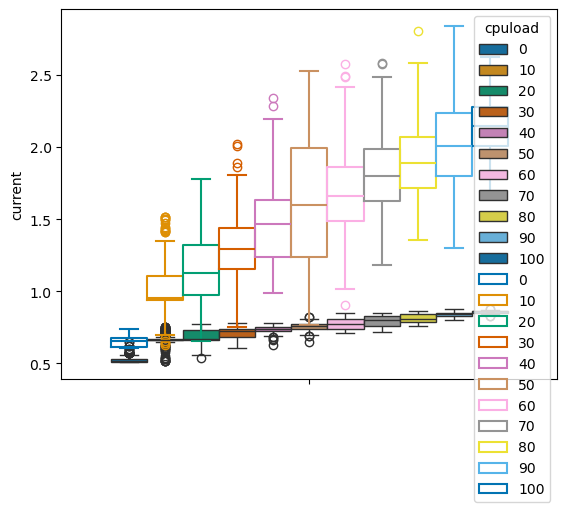

In [64]:
sns.boxplot(data=df_siglentlog, y='current', hue='cpuload', palette='colorblind')
sns.boxplot(data=df_energylog, y='current', hue='cpuload', palette='colorblind',fill=False)
plt.savefig('boxplot current.png')

/var/folders/3_/r11vrzdx1s1gbnbp1ghbz_7h0000gn/T/ipykernel_36953/3765924874.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_siglentlog, x='cpuload', y='current',palette='colorblind')


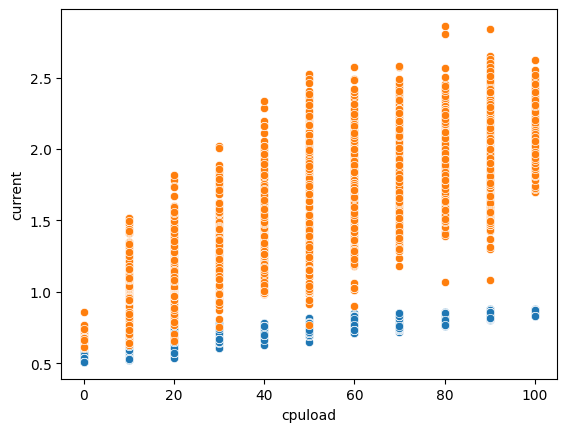

In [21]:
sns.scatterplot(data=df_siglentlog, x='cpuload', y='current',palette='colorblind')
sns.scatterplot(data=df_energylog, x='cpuload', y='current')
plt.savefig('scatterplot.png')

In [22]:
x = np.array(df_siglentlog['cpuload']).reshape((-1, 1))
y = np.array(df_siglentlog['current'])

coefficient of determination: 0.8112298462920746
intercept: 0.6042525109493591
slope: [0.00270467]


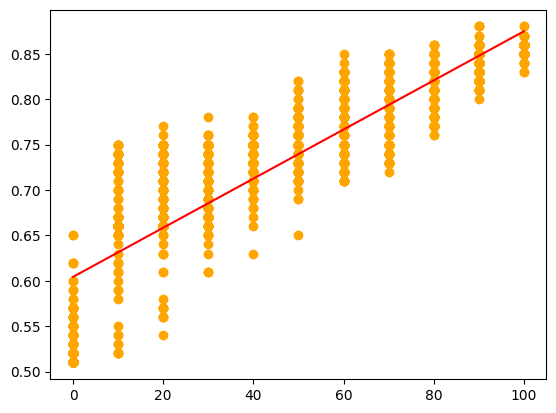

In [23]:
model = LinearRegression()
model.fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.intercept_ + model.coef_ * x

#sns.scatterplot(data=df_siglentlog, x='cpuload', y='current')
plt.plot(x,y,'o',color='orange')
plt.plot(x,y_pred,'-r')

<Axes: xlabel='current'>

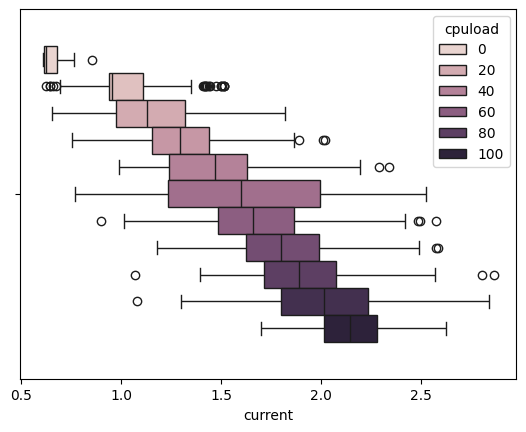

In [24]:
sns.boxplot(data=df_energylog, x='current', hue='cpuload')

In [25]:
x_e = np.array(df_energylog['cpuload']).reshape((-1, 1))
y_e = np.array(df_energylog['current'])

coefficient of determination: 0.712015684011643
intercept: 0.8502994202430818
slope: [0.01343076]


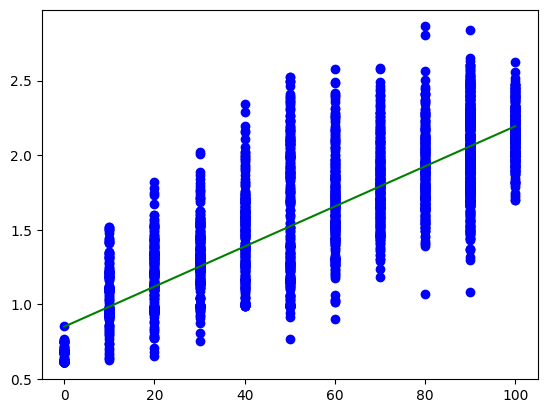

In [26]:
model = LinearRegression()
model.fit(x_e, y_e)

r_sq = model.score(x_e, y_e)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_e_pred = model.intercept_ + model.coef_ * x_e

#sns.scatterplot(data=df_siglentlog, x='cpuload', y='current')
plt.plot(x_e,y_e,'o',color='blue')
plt.plot(x_e,y_e_pred,'-g')

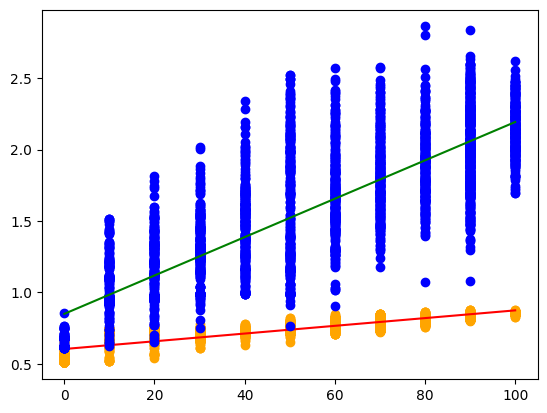

In [32]:

plt.plot(x,y,'o',color='orange')
plt.plot(x,y_pred,'-r')

plt.plot(x_e,y_e,'o',color='blue')
plt.plot(x_e,y_e_pred,'-g')
plt.savefig('scatterplot with CPU load to Current Prediction (Linear Regression).png')

In [28]:
# Ensure equal length for fair comparison
n = min(len(df_energylog), len(df_siglentlog))
energy_curr = df_energylog["current"].iloc[:n].values
siglent_curr = df_siglentlog["current"].iloc[:n].values

# Compute Pearson correlation
corr_val = pd.Series(energy_curr).corr(pd.Series(siglent_curr))
print("Correlation (Pearson r):", corr_val)


Correlation (Pearson r): 0.7994367098264606


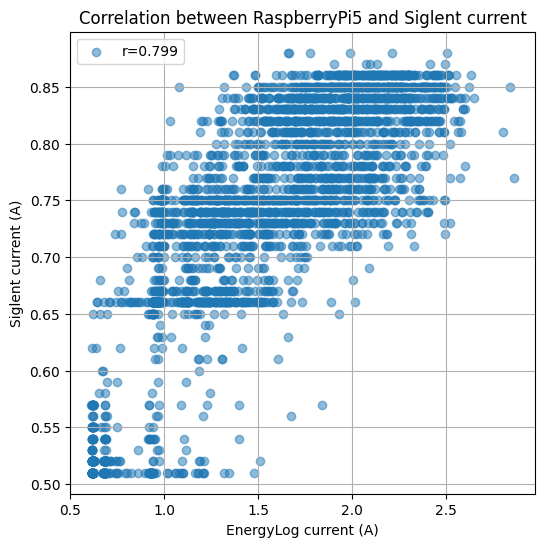

In [31]:
# --- Scatter plot ---
plt.figure(figsize=(6,6))
plt.scatter(energy_curr, siglent_curr, alpha=0.5, label=f"r={corr_val:.3f}")
plt.xlabel("EnergyLog current (A)")
plt.ylabel("Siglent current (A)")
plt.title("Correlation between RaspberryPi5 and Siglent current")
plt.legend()
plt.grid(True)
plt.savefig('correlation.png')
plt.show()


# Power

In [243]:
df_siglentlog['power_calc'] = df_siglentlog['current']*df_siglentlog['voltage']
df_energylog['power_calc'] = df_energylog['current']*df_energylog['voltage']

In [245]:
df_siglentlog['measure'] = 'internal'
df_energylog['measure'] = 'external'

In [214]:
siglent_min_time = df_siglentlog['time'].min()
df_siglentlog['time_reset'] = df_siglentlog['time'] - siglent_min_time

df_energylog_min_time = df_energylog['time'].min()
df_energylog['time_reset'] = df_energylog['time'] - df_energylog_min_time


In [247]:
df_siglentlog

,time,voltage,current,cpuload,time_reset,power_calc,measure
0,1.758017e+09,5,0.52,NaN,0.000,2.60,internal
1,1.758017e+09,5,0.52,NaN,0.301,2.60,internal
2,1.758017e+09,5,0.52,NaN,0.603,2.60,internal
3,1.758017e+09,5,0.52,NaN,0.903,2.60,internal
4,1.758017e+09,5,0.55,NaN,1.202,2.75,internal
...,...,...,...,...,...,...,...
5587,1.758019e+09,5,0.54,NaN,1676.110,2.70,internal
5588,1.758019e+09,5,0.51,NaN,1676.401,2.55,internal
5589,1.758019e+09,5,0.54,NaN,1676.703,2.70,internal
5590,1.758019e+09,5,0.51,NaN,1677.001,2.55,internal


In [181]:
df_energylog

,time,voltage,current,cpuload,time_datetime,time_reset,power_calc,measure
184,55.474,0.874089,0.81263,0.0,1970-01-01 00:00:00.000000055,0.000,0.710311,external
185,55.572,0.747569,0.62510,0.0,1970-01-01 00:00:00.000000055,0.098,0.467305,external
186,55.672,0.747569,0.63403,0.0,1970-01-01 00:00:00.000000055,0.198,0.473981,external
187,55.772,0.748913,0.62510,0.0,1970-01-01 00:00:00.000000055,0.298,0.468146,external
188,55.872,0.749987,0.61617,0.0,1970-01-01 00:00:00.000000055,0.398,0.462119,external
...,...,...,...,...,...,...,...,...
11978,1234.872,0.874089,2.11641,100.0,1970-01-01 00:00:00.000001234,1179.398,1.849931,external
11979,1234.972,0.873821,2.32180,100.0,1970-01-01 00:00:00.000001234,1179.498,2.028838,external
11980,1235.072,0.873552,1.72349,100.0,1970-01-01 00:00:00.000001235,1179.598,1.505558,external
11981,1235.172,0.874627,2.82188,100.0,1970-01-01 00:00:00.000001235,1179.698,2.468092,external


In [216]:
df = pd.concat([df_siglentlog,df_energylog])

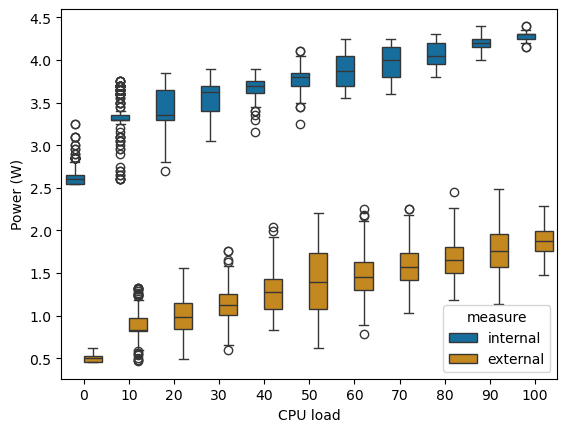

In [80]:
sns.boxplot(data=df, x ='cpuload', y='power_calc', hue='measure', palette='colorblind')
plt.xlabel('CPU load')
plt.ylabel('Power (W)')
plt.savefig('boxplot power.png')

In [130]:
df

,time,voltage,current,cpuload,time_reset,power_calc,measure,time_datetime
0,1.758017e+09,5.000000,0.52000,NaN,0.000,2.600000,internal,NaT
1,1.758017e+09,5.000000,0.52000,NaN,0.301,2.600000,internal,NaT
2,1.758017e+09,5.000000,0.52000,NaN,0.603,2.600000,internal,NaT
3,1.758017e+09,5.000000,0.52000,NaN,0.903,2.600000,internal,NaT
4,1.758017e+09,5.000000,0.55000,NaN,1.202,2.750000,internal,NaT
...,...,...,...,...,...,...,...,...
11978,1.234872e+03,0.874089,2.11641,100.0,1179.398,1.849931,external,1970-01-01 00:00:00.000001234
11979,1.234972e+03,0.873821,2.32180,100.0,1179.498,2.028838,external,1970-01-01 00:00:00.000001234
11980,1.235072e+03,0.873552,1.72349,100.0,1179.598,1.505558,external,1970-01-01 00:00:00.000001235
11981,1.235172e+03,0.874627,2.82188,100.0,1179.698,2.468092,external,1970-01-01 00:00:00.000001235


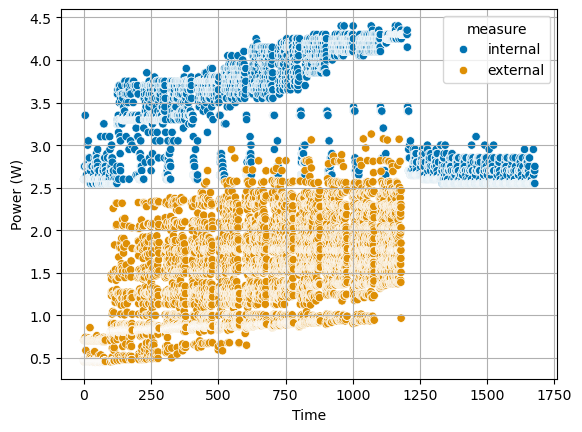

In [220]:
sns.scatterplot(data=df, x ='time_reset', y='power_calc', hue='measure', palette='colorblind')
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Power (W)')
plt.savefig('boxplot power over time.png')

Correlation (Pearson r): 0.7152347177090808


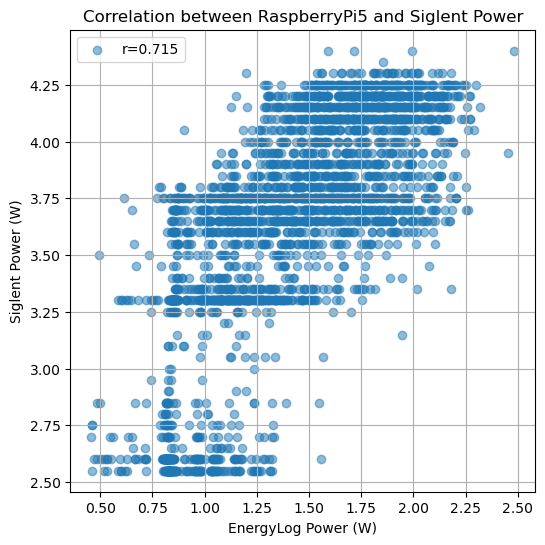

In [82]:
# Ensure equal length for fair comparison
n = min(len(df_energylog), len(df_siglentlog))
energy_power = df_energylog["power_calc"].iloc[:n].values
siglent_power = df_siglentlog["power_calc"].iloc[:n].values

# Compute Pearson correlation
corr_val = pd.Series(energy_power).corr(pd.Series(siglent_power))
print("Correlation (Pearson r):", corr_val)

# --- Scatter plot ---
plt.figure(figsize=(6,6))
plt.scatter(energy_power, siglent_power, alpha=0.5, label=f"r={corr_val:.3f}")
plt.xlabel("EnergyLog Power (W)")
plt.ylabel("Siglent Power (W)")
plt.title("Correlation between RaspberryPi5 and Siglent Power")
plt.legend()
plt.grid(True)
plt.savefig('correlation.png')
plt.show()


In [64]:
df_energylog['logger']='EnergyLog'
df_siglentlog['logger'] = 'SiglentLog'

In [323]:
df= pd.concat([df_energylog,df_siglentlog])

In [325]:
df = df.reset_index()

In [327]:
df

,index,time,voltage,current,cpuload,logger
0,184,5.547400e+01,0.874089,0.81263,0.0,EnergyLog
1,185,5.557200e+01,0.747569,0.62510,0.0,EnergyLog
2,186,5.567200e+01,0.747569,0.63403,0.0,EnergyLog
3,187,5.577200e+01,0.748913,0.62510,0.0,EnergyLog
4,188,5.587200e+01,0.749987,0.61617,0.0,EnergyLog
...,...,...,...,...,...,...
12848,4006,1.758019e+09,5.000000,0.86000,100.0,SiglentLog
12849,4007,1.758019e+09,5.000000,0.86000,100.0,SiglentLog
12850,4008,1.758019e+09,5.000000,0.87000,100.0,SiglentLog
12851,4009,1.758019e+09,5.000000,0.83000,100.0,SiglentLog


In [329]:
df = df.dropna()

<Axes: xlabel='current', ylabel='logger'>

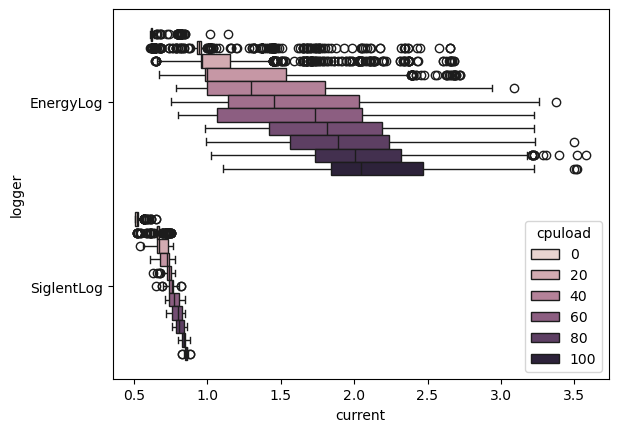

In [331]:
sns.boxplot(data=df, x='current', y='logger', hue='cpuload')

In [333]:
df.to_csv('all_logs_10_20_100.csv')

In [335]:
df_energylog.reset_index() 

KeyError: 'timestamp'

In [339]:
df_energylog

,index,time,voltage,current,cpuload,logger,time_datetime
0,184,55.474,0.874089,0.81263,0.0,EnergyLog,1970-01-01 00:00:00.000000055
1,185,55.572,0.747569,0.62510,0.0,EnergyLog,1970-01-01 00:00:00.000000055
2,186,55.672,0.747569,0.63403,0.0,EnergyLog,1970-01-01 00:00:00.000000055
3,187,55.772,0.748913,0.62510,0.0,EnergyLog,1970-01-01 00:00:00.000000055
4,188,55.872,0.749987,0.61617,0.0,EnergyLog,1970-01-01 00:00:00.000000055
...,...,...,...,...,...,...,...
9588,11978,1234.872,0.874089,2.11641,100.0,EnergyLog,1970-01-01 00:00:00.000001234
9589,11979,1234.972,0.873821,2.32180,100.0,EnergyLog,1970-01-01 00:00:00.000001234
9590,11980,1235.072,0.873552,1.72349,100.0,EnergyLog,1970-01-01 00:00:00.000001235
9591,11981,1235.172,0.874627,2.82188,100.0,EnergyLog,1970-01-01 00:00:00.000001235
